In [1]:
import numpy as np
import tensorflow as tf
from analysis_functions import Analysis
import matplotlib.pyplot as plt

2023-06-06 11:57:31.561794: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-06 11:57:31.561837: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
uqc_2qubits_2layers_path = "../../results/overparametrization/2_qubits_2layer"
uqc_2qubits_5layers_path = "../../results/overparametrization/2_qubits_5layer"
uqc_2qubits_8layers_path = "../../results/overparametrization/2_qubits_8layer"
uqc_2qubits_10layers_path = "../../results/overparametrization/2_qubits_10layer"

skolik_2layers_path = "../../results/overparametrization/skolik_2layers"
skolik_5layers_path = "../../results/overparametrization/skolik_5layers"
skolik_8layers_path = "../../results/overparametrization/skolik_8layers"
skolik_10layers_path = "../../results/overparametrization/skolik_10layers"

skolik_2layers = Analysis(skolik_2layers_path)
skolik_5layers = Analysis(skolik_5layers_path)
skolik_8layers = Analysis(skolik_8layers_path)
skolik_10layers = Analysis(skolik_10layers_path)

uqc_2qubits_2layers = Analysis(uqc_2qubits_2layers_path)
uqc_2qubits_5layers = Analysis(uqc_2qubits_5layers_path)
uqc_2qubits_8layers = Analysis(uqc_2qubits_8layers_path)
uqc_2qubits_10layers = Analysis(uqc_2qubits_10layers_path)

In [19]:
uqc_2qubits_2layers_parameters_relative_change = uqc_2qubits_2layers.get_parameters_relative_change()
uqc_2qubits_5layers_parameters_relative_change = uqc_2qubits_5layers.get_parameters_relative_change()
uqc_2qubits_8layers_parameters_relative_change = uqc_2qubits_8layers.get_parameters_relative_change()
uqc_2qubits_10layers_parameters_relative_change = uqc_2qubits_10layers.get_parameters_relative_change()

skolik_5layers_parameters_relative_change = skolik_5layers.get_parameters_relative_change()
skolik_2layers_parameters_relative_change = skolik_2layers.get_parameters_relative_change()
skolik_8layers_parameters_relative_change = skolik_8layers.get_parameters_relative_change()
skolik_10layers_parameters_relative_change = skolik_10layers.get_parameters_relative_change()

In [24]:
def filter_lists(lists):
    min_length = 10000  # Find the length of the smallest list
    
    filtered_lists = []
    for lst in lists:
        filtered_lst = lst[:min_length]  # Take only the first min_length elements
        filtered_lists.append(filtered_lst)  # Add the filtered list to the result
    
    return filtered_lists

uqc_2qubits_2layers_parameters_relative_change = filter_lists(uqc_2qubits_2layers_parameters_relative_change)
uqc_2qubits_5layers_parameters_relative_change = filter_lists(uqc_2qubits_5layers_parameters_relative_change)
uqc_2qubits_8layers_parameters_relative_change = filter_lists(uqc_2qubits_8layers_parameters_relative_change)
uqc_2qubits_10layers_parameters_relative_change = filter_lists(uqc_2qubits_10layers_parameters_relative_change)

skolik_5layers_parameters_relative_change = filter_lists(skolik_5layers_parameters_relative_change)
skolik_2layers_parameters_relative_change = filter_lists(skolik_2layers_parameters_relative_change)
skolik_8layers_parameters_relative_change = filter_lists(skolik_8layers_parameters_relative_change)
skolik_10layers_parameters_relative_change = filter_lists(skolik_10layers_parameters_relative_change)

In [25]:
uqc_2layers_parameters_relative_change_mean = np.mean(uqc_2qubits_2layers_parameters_relative_change, axis=0)
uqc_5layers_parameters_relative_change_mean = np.mean(uqc_2qubits_5layers_parameters_relative_change, axis=0)
uqc_8layers_parameters_relative_change_mean = np.mean(uqc_2qubits_8layers_parameters_relative_change, axis=0)
uqc_10layers_parameters_relative_change_mean = np.mean(uqc_2qubits_10layers_parameters_relative_change, axis=0)

skolik_5layers_parameters_relative_change_mean = np.mean(skolik_5layers_parameters_relative_change, axis=0)
skolik_2layers_parameters_relative_change_mean = np.mean(skolik_2layers_parameters_relative_change, axis=0)
skolik_8layers_parameters_relative_change_mean = np.mean(skolik_8layers_parameters_relative_change, axis=0)
skolik_10layers_parameters_relative_change_mean = np.mean(skolik_10layers_parameters_relative_change, axis=0)

In [26]:
uqc_2qubits_2layers_return = uqc_2qubits_2layers.get_rewards()
uqc_2qubits_5layers_return = uqc_2qubits_5layers.get_rewards()
uqc_2qubits_8layers_return = uqc_2qubits_8layers.get_rewards()
uqc_2qubits_10layers_return = uqc_2qubits_10layers.get_rewards()

skolik_2layers_return = skolik_2layers.get_rewards()
skolik_5layers_return = skolik_5layers.get_rewards()
skolik_8layers_return = skolik_8layers.get_rewards()
skolik_10layers_return = skolik_10layers.get_rewards()

uqc_2qubits_2layers_mean = np.mean(uqc_2qubits_2layers_return, axis=0)
uqc_2qubits_5layers_mean = np.mean(uqc_2qubits_5layers_return, axis=0)
uqc_2qubits_8layers_mean = np.mean(uqc_2qubits_8layers_return, axis=0)
uqc_2qubits_10layers_mean = np.mean(uqc_2qubits_10layers_return, axis=0)

skolik_2layers_mean = np.mean(skolik_2layers_return, axis=0)
skolik_5layers_mean = np.mean(skolik_5layers_return, axis=0)
skolik_8layers_mean = np.mean(skolik_8layers_return, axis=0)
skolik_10layers_mean = np.mean(skolik_10layers_return, axis=0)

uqc_2qubits_2layers_std = np.std(uqc_2qubits_2layers_return, axis=0)
uqc_2qubits_5layers_std = np.std(uqc_2qubits_5layers_return, axis=0)
uqc_2qubits_8layers_std = np.std(uqc_2qubits_8layers_return, axis=0)
uqc_2qubits_10layers_std = np.std(uqc_2qubits_10layers_return, axis=0)

skolik_2layers_std = np.std(skolik_2layers_return, axis=0)
skolik_5layers_std = np.std(skolik_5layers_return, axis=0)
skolik_8layers_std = np.std(skolik_8layers_return, axis=0)
skolik_10layers_std = np.std(skolik_10layers_return, axis=0)

Let's start by comparing the Relative change of parameters for the UQC models along with the performance of those agents.

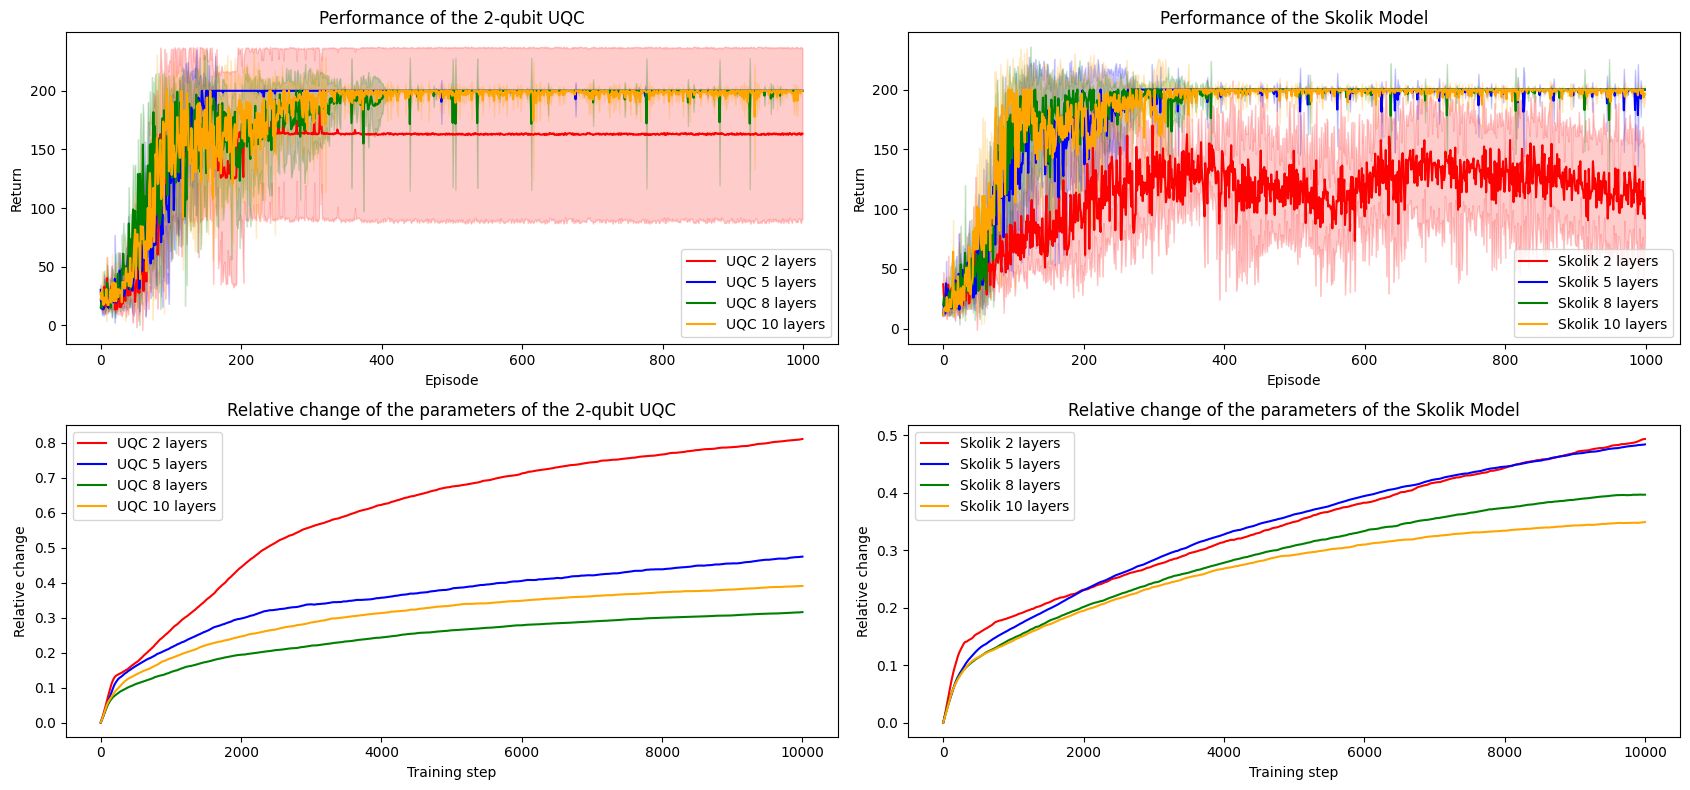

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(17, 8), tight_layout=True)

axs[0,0].plot(uqc_2qubits_2layers_mean, color = "red", label='UQC 2 layers')
axs[0,0].plot(uqc_2qubits_5layers_mean, color = "blue", label='UQC 5 layers')
axs[0,0].plot(uqc_2qubits_8layers_mean, color = "green", label='UQC 8 layers')
axs[0,0].plot(uqc_2qubits_10layers_mean, color = "orange", label='UQC 10 layers')

axs[0,0].fill_between(range(len(uqc_2qubits_2layers_mean)), uqc_2qubits_2layers_mean - uqc_2qubits_2layers_std, uqc_2qubits_2layers_mean + uqc_2qubits_2layers_std, alpha=0.2, color = "red")
axs[0,0].fill_between(range(len(uqc_2qubits_5layers_mean)), uqc_2qubits_5layers_mean - uqc_2qubits_5layers_std, uqc_2qubits_5layers_mean + uqc_2qubits_5layers_std, alpha=0.2, color = "blue")
axs[0,0].fill_between(range(len(uqc_2qubits_8layers_mean)), uqc_2qubits_8layers_mean - uqc_2qubits_8layers_std, uqc_2qubits_8layers_mean + uqc_2qubits_8layers_std, alpha=0.2, color = "green")
axs[0,0].fill_between(range(len(uqc_2qubits_10layers_mean)), uqc_2qubits_10layers_mean - uqc_2qubits_10layers_std, uqc_2qubits_10layers_mean + uqc_2qubits_10layers_std, alpha=0.2, color = "orange")

axs[0,0].set_title("Performance of the 2-qubit UQC")
axs[0,0].set_xlabel("Episode")
axs[0,0].set_ylabel("Return")
axs[0,0].legend()

axs[0,1].plot(skolik_2layers_mean, color = "red", label='Skolik 2 layers')
axs[0,1].plot(skolik_5layers_mean, color = "blue", label='Skolik 5 layers')
axs[0,1].plot(skolik_8layers_mean, color = "green", label='Skolik 8 layers')
axs[0,1].plot(skolik_10layers_mean, color = "orange", label='Skolik 10 layers')

axs[0,1].fill_between(range(len(skolik_2layers_mean)), skolik_2layers_mean - skolik_2layers_std, skolik_2layers_mean + skolik_2layers_std, alpha=0.2, color = "red")
axs[0,1].fill_between(range(len(skolik_5layers_mean)), skolik_5layers_mean - skolik_5layers_std, skolik_5layers_mean + skolik_5layers_std, alpha=0.2, color = "blue")
axs[0,1].fill_between(range(len(skolik_8layers_mean)), skolik_8layers_mean - skolik_8layers_std, skolik_8layers_mean + skolik_8layers_std, alpha=0.2, color = "green")
axs[0,1].fill_between(range(len(skolik_10layers_mean)), skolik_10layers_mean - skolik_10layers_std, skolik_10layers_mean + skolik_10layers_std, alpha=0.2, color = "orange")

axs[0,1].set_title("Performance of the Skolik Model")
axs[0,1].set_xlabel("Episode")
axs[0,1].set_ylabel("Return")
axs[0,1].legend()

axs[1,0].plot(uqc_2layers_parameters_relative_change_mean, color = "red", label='UQC 2 layers')
axs[1,0].plot(uqc_5layers_parameters_relative_change_mean, color = "blue", label='UQC 5 layers')
axs[1,0].plot(uqc_8layers_parameters_relative_change_mean, color = "green", label='UQC 8 layers')
axs[1,0].plot(uqc_10layers_parameters_relative_change_mean, color = "orange", label='UQC 10 layers')

axs[1,0].set_title("Relative change of the parameters of the 2-qubit UQC")
axs[1,0].set_xlabel("Training step")
axs[1,0].set_ylabel("Relative change")
axs[1,0].legend()

axs[1,1].plot(skolik_2layers_parameters_relative_change_mean, color = "red", label='Skolik 2 layers')
axs[1,1].plot(skolik_5layers_parameters_relative_change_mean, color = "blue", label='Skolik 5 layers')
axs[1,1].plot(skolik_8layers_parameters_relative_change_mean, color = "green", label='Skolik 8 layers')
axs[1,1].plot(skolik_10layers_parameters_relative_change_mean, color = "orange", label='Skolik 10 layers')

axs[1,1].set_title("Relative change of the parameters of the Skolik Model")
axs[1,1].set_xlabel("Training step")
axs[1,1].set_ylabel("Relative change")
axs[1,1].legend()



Very interesting. It clearly seems to work. The parameters seem to change less as the number of layers increases. Let's however note that it is not the case for the UQC with 8 and 10 layers, although this could be explained due to the fact that the number of layers is very similar and there is some variance in this process, obviously.

Now let's try to compare the two models for different number of layers.

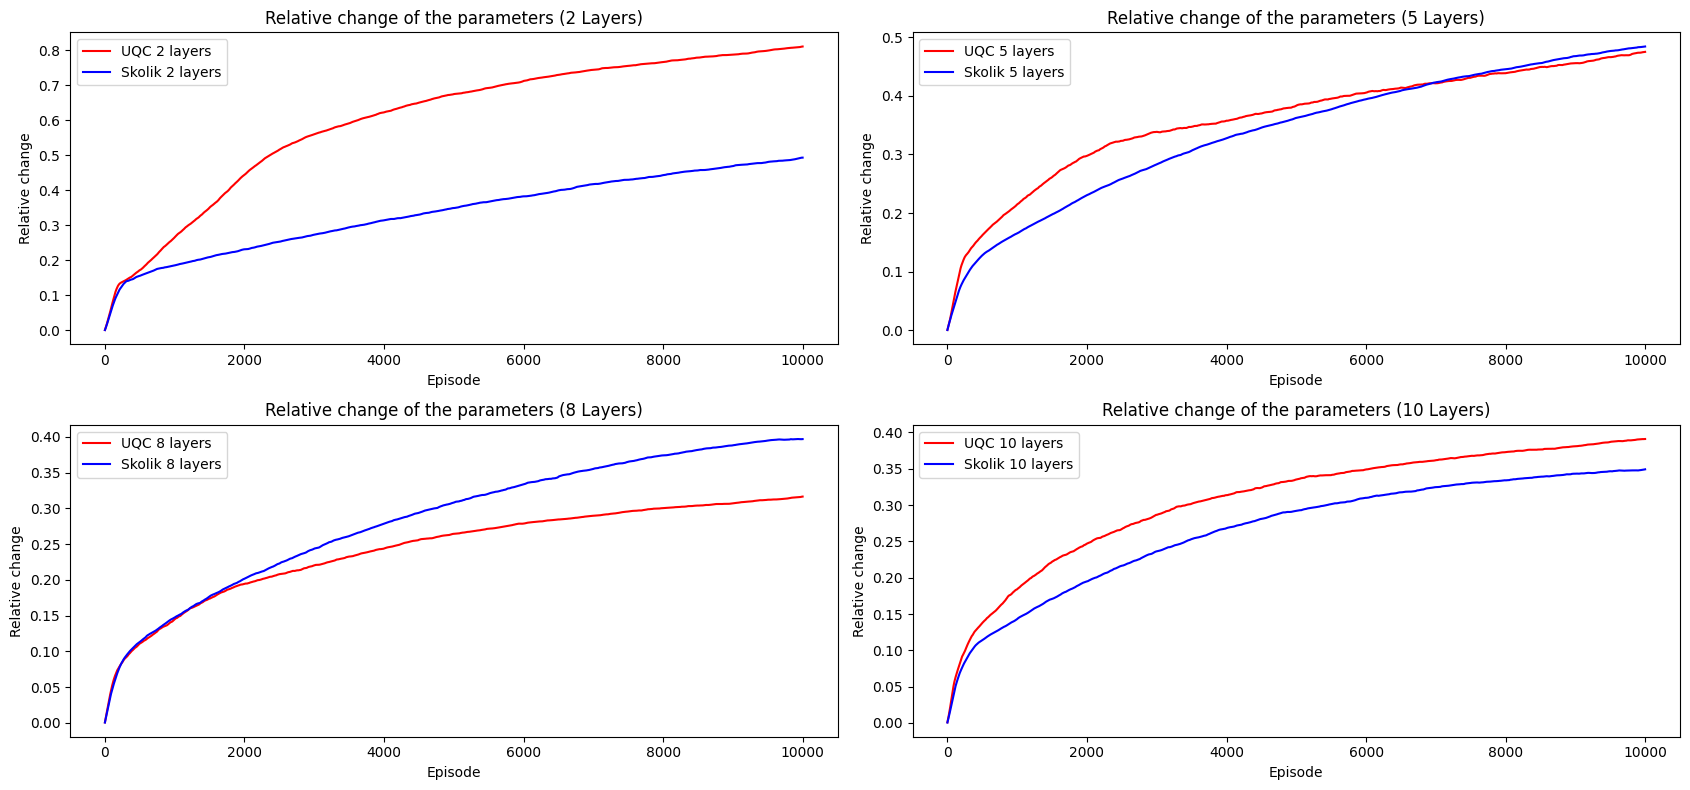

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(17, 8), tight_layout=True)

axs[0,0].plot(uqc_2layers_parameters_relative_change_mean, color = "red", label='UQC 2 layers')
axs[0,0].plot(skolik_2layers_parameters_relative_change_mean, color = "blue", label='Skolik 2 layers')

axs[0,0].set_title("Relative change of the parameters (2 Layers)")
axs[0,0].set_xlabel("Episode")
axs[0,0].set_ylabel("Relative change")
axs[0,0].legend()

axs[0,1].plot(uqc_5layers_parameters_relative_change_mean, color = "red", label='UQC 5 layers')
axs[0,1].plot(skolik_5layers_parameters_relative_change_mean, color = "blue", label='Skolik 5 layers')

axs[0,1].set_title("Relative change of the parameters (5 Layers)")
axs[0,1].set_xlabel("Episode")
axs[0,1].set_ylabel("Relative change")
axs[0,1].legend()

axs[1,0].plot(uqc_8layers_parameters_relative_change_mean, color = "red", label='UQC 8 layers')
axs[1,0].plot(skolik_8layers_parameters_relative_change_mean, color = "blue", label='Skolik 8 layers')

axs[1,0].set_title("Relative change of the parameters (8 Layers)")
axs[1,0].set_xlabel("Episode")
axs[1,0].set_ylabel("Relative change")
axs[1,0].legend()

axs[1,1].plot(uqc_10layers_parameters_relative_change_mean, color = "red", label='UQC 10 layers')
axs[1,1].plot(skolik_10layers_parameters_relative_change_mean, color = "blue", label='Skolik 10 layers')

axs[1,1].set_title("Relative change of the parameters (10 Layers)")
axs[1,1].set_xlabel("Episode")
axs[1,1].set_ylabel("Relative change")
axs[1,1].legend()

plt.show()